# 대한민국 구석구석 사이트에 검색어 자동 입력하기
### chromedrive.exe의 위치는 이 주피터 노트북이 있는 디렉토리 안에 있어야 함

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import os

In [2]:
query_text = input('크롤링할 키워드를 입력하세요 : ')

크롤링할 키워드를 입력하세요 : 여름여행


In [3]:
# chrome 드라이버를 사용해서 웹 브라우저를 실행
path="./chromedriver.exe"
driver=webdriver.Chrome(path)
driver.get("https://korean.visitkorea.or.kr/main/main.do#home") # 대한민국 구석구석 페이지
time.sleep(2) # 페이지가 모두 열릴 때 까지 2초 기다리기
driver.find_element_by_id('chkForm01').click()

In [4]:
# 검색창에 검색어를 입력
element=driver.find_element_by_id("inp_search")
element.send_keys(query_text)

In [5]:
# 검색 버튼을 눌러 실행
driver.find_element_by_link_text("검색").click()

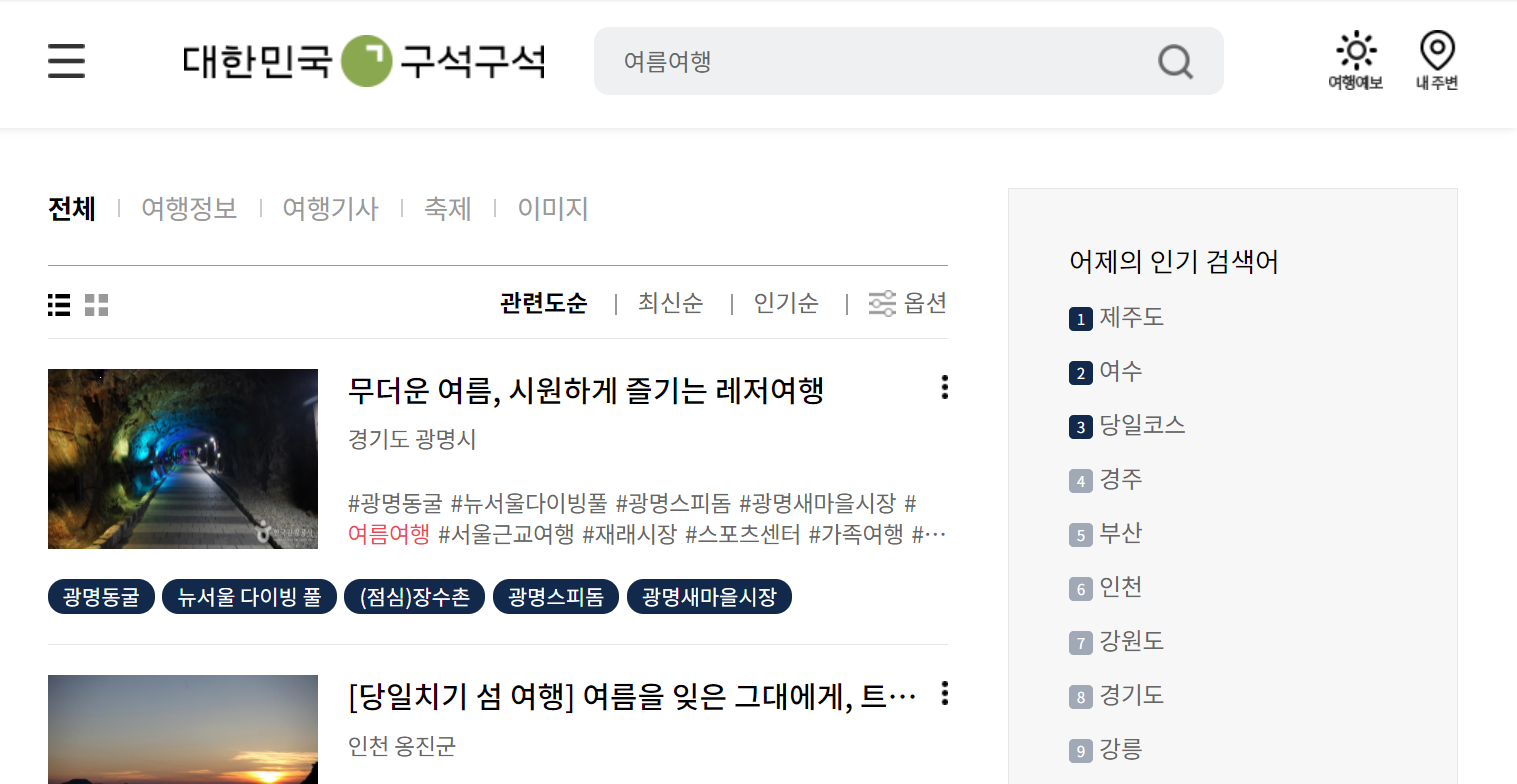

In [6]:
from IPython.display import Image
Image("image/대한민국 구석구석.png")